# Data and Visualization

# Introduction

This assignment is about getting familiar to tools such as Python, numpy, matplotlib, pandas, and Jupyter notebook. The task of the assignment is to use different techniques of pre-processing and visualization of data that would make the data more refined and give a clear idea of which algorithms to be used in testing and predicting the results of the data. Since this is a warm up assignment and we are only required to plot the data and give preliminary observation about the data we won't we using any algorithm.
I have visualized the data one for classification and one for regression with more than 10,000 samples and 10 feature values. 

# <font color="#FA8258">Regression Dataset </font>

## Dataset Description
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular place and return back at another place. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. <br>

**It consists of the following attributes:**
1. instant: record index
2. dteday : date
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. holiday : weather day is holiday or not
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit :<br>
    1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
10. temp : Normalized temperature in Celsius. 
11. atemp: Normalized feeling temperature in Celsius. 
12. hum: Normalized humidity.
13. windspeed: Normalized wind speed.
14. casual: count of non-registered users
15. registered: count of registered users
16. cnt: count of total rental bikes (including both casual and registered)

## Source of data
https://archive.ics.uci.edu/ml/machine-learning-databases/00350/

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Sample of first few rows

In [369]:
data = pd.read_csv(r'Bike Sharing System.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Variable Data Type

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**_Checking the type of each variable and if there are any missing values in the dataset. Since all the columns have 731 entries, we will continue with further stages of pre-processing._**

In [371]:
categoryVariableList = ["hr", "weekday", "mnth", "season", "weathersit", "holiday", "workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")

In [372]:
data.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

**As a part of pre-processing, columns such as hour, week day, month, season, weather, holiday and working day should be of 'category' data type but the current data type is 'int' for those columns. Coercing the datatype of  "hr", "weekday", "mnth", "season", "weathersit", "holiday", "workingday" to category**

In [373]:
data['season'].replace({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'}, inplace=True)
data['mnth'].replace({1 : "January",2 : "February",3 : "March",4 : "April", 5 : "May", 6 : "June", 7 : "July",8 : "August",9 : "September",10 : "October",11 : "November",12 : "December"}, inplace=True)

*Replacing number with characters so that graphs look more visually appealing and user readable.*

### Analysing the outliers

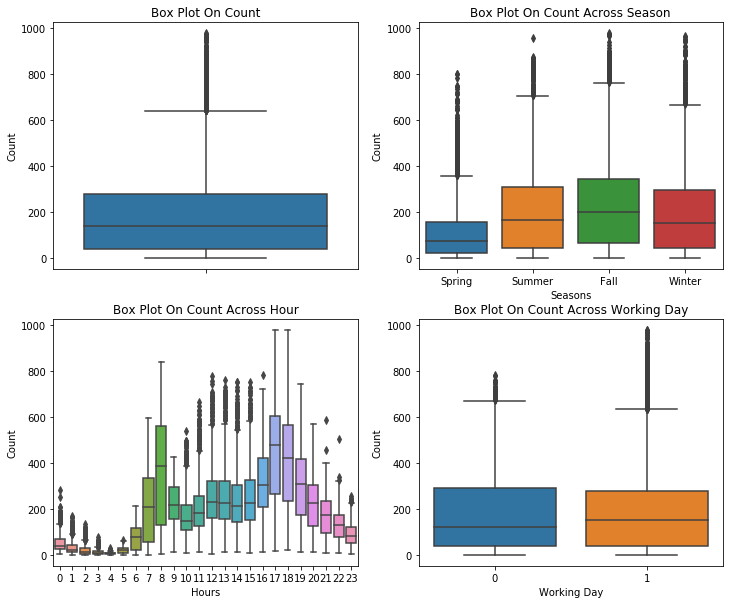

In [374]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Seasons', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hours', ylabel='Count',title="Box Plot On Count Across Hour")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

_The "cnt" variable contains lot of outlier data points which skews the distribution towards right.But in addition to that, following inferences can also been made from boxplots._

* Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
* The boxplot on count across hour shows that the median value are relatively higher at 8AM - 9AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
* Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day" which is visible from the figure

### Correlation Matrix

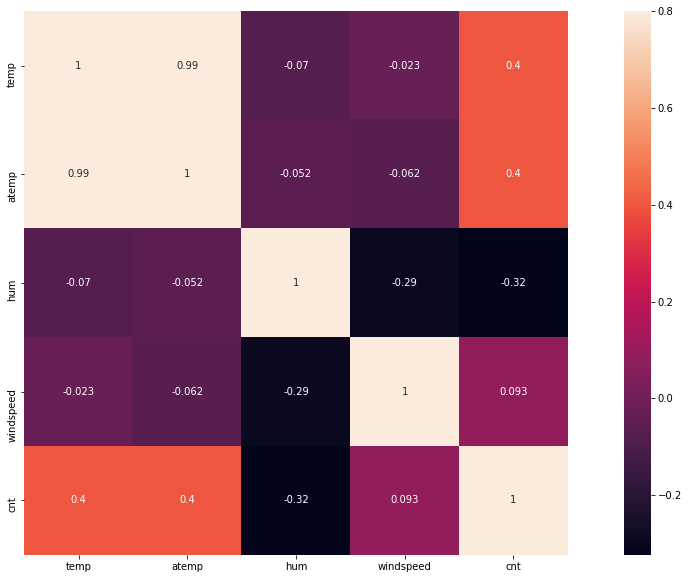

In [375]:
corrmatr = data[["temp","atemp","hum","windspeed","cnt"]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmatr,vmax=.8, square=True,annot=True)

_Plotting correlation plot between "count" and ["temp", "atemp","hum", "windspeed"]._
* temp and atemp features has got positive correlation with count.
* hum has got negative correlation with count.
* windspeed is not gonna be really useful in this case which can be seen from its correlation with count.

### Bar Plot

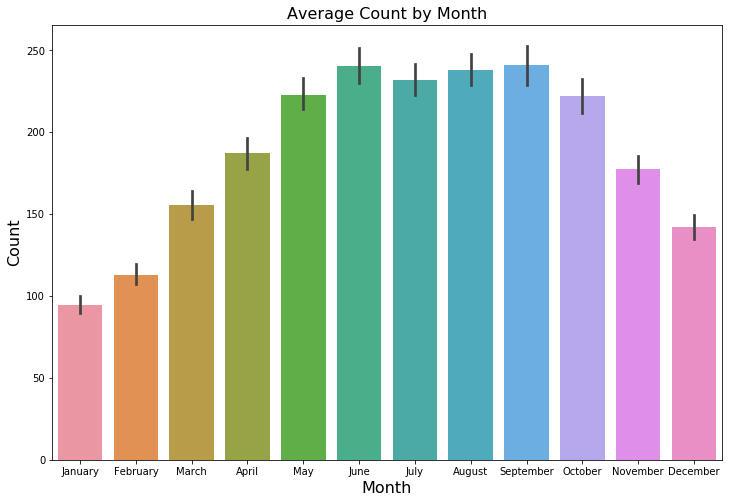

In [376]:
plt.subplots(figsize=(12,8))
sortmonth = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.barplot(data=data,x="mnth",y="cnt", order=sortmonth)
plt.title("Average Count by Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Count", fontsize=16)

*From the above barplot we can infer that people like to rent bike during summer season because the weather is perfect for riding bikes. Hence, June, July, August and September have relatively higher demand for the bike.* 

### Point Plot

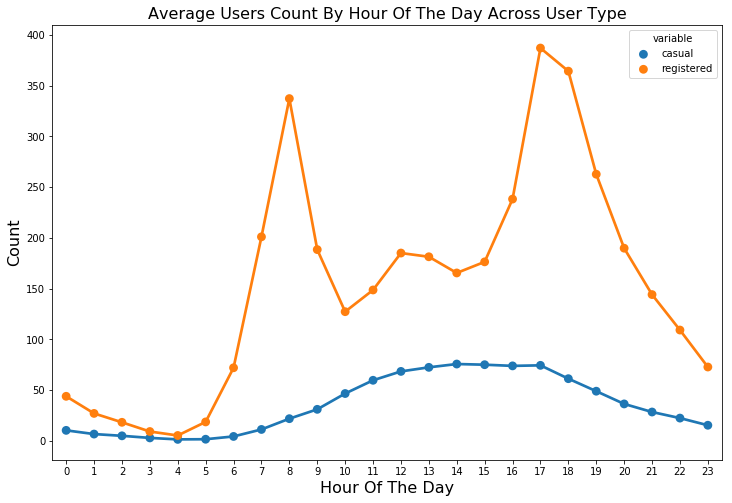

In [377]:
plt.subplots(figsize=(12,8))
hourTransformed = pd.melt(data[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True)
plt.title("Average Users Count By Hour Of The Day Across User Type", fontsize=16)
plt.xlabel("Hour Of The Day", fontsize=16)
plt.ylabel("Count", fontsize=16)

*From the above point plot we can infer that user count around 7am - 8am and 5pm  - 6pm is contributed more by registered users. As mentioned earlier this can be attributed to regular school and office commuters.*

# <font color="#04B4AE"> Classification Dataset </font>

## Dataset Description:
This research was conducted in Chung Hua University, Taiwan and aims at customer's credit card default payments. The goal is to classify whether the customer will have a default payment for the following month or not. The dataset has 23 inputs on which the decision will depend.

**It consists of the following attributes:**
1. default payment (Yes = 1, No = 0) 
2. X1: Amount of the given credit
3. X2: Gender (1 = male; 2 = female). 
4. X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
5. X4: Marital status (1 = married; 2 = single; 3 = others). 
6. X5: Age (year). 
7. X6 - X11: History of past payment. Tracked the past monthly payment records (from April to September, for the year 2005) as follows:<br>
X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.<br>
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
8. X12-X17: Amount of bill statement.<br>
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
9. X18-X23: Amount of previous payment. <br>
X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Source of data
https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

### Sample of first few rows

In [378]:
df = pd.read_csv(r'Credit Card Defaulters.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Variable Data Type

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

**_Checking the type of each variable and if there are any missing values in the dataset. Since all the columns have 30000 entries, we will continue with further stages of pre-processing._**

In [389]:
df['SEX'].replace({1: 'Male', 2 : 'Female'}, inplace=True)
df['MARRIAGE'].replace({1: 'Married', 2 : 'Single', 3 : 'Others'}, inplace=True)
df['EDUCATION'].replace({1: 'Gradudate School', 2 : 'Univeristy', 3 : 'High School', 4 : 'Others'}, inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,Univeristy,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,Univeristy,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,Univeristy,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,Univeristy,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,Univeristy,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**As a part of pre-processing replacing number with characters so that graphs look more visually appealing and user readable.**

### Correlation Matrix

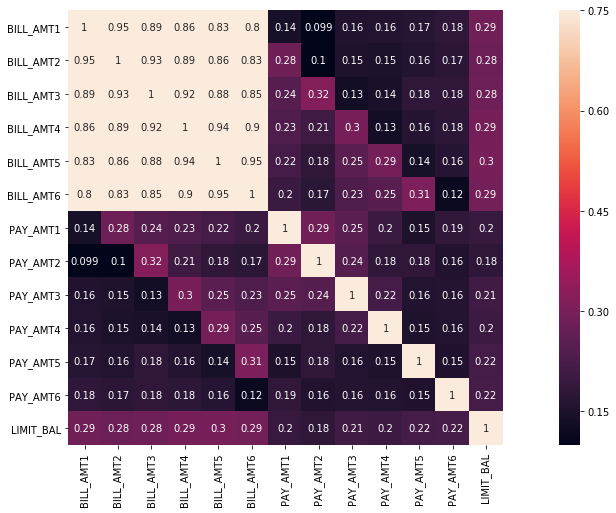

In [382]:
corrmat=df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6","LIMIT_BAL" ]].corr()
fig, plot2=plt.subplots(figsize=(20,8))
sns.heatmap(corrmat, vmax=.75, square=True, annot=True)
plt.show()

*I have created a correlation matrix between limit balances, bill amounts and payments amounts. We can infer that there is a low correlation between the limit balances and payments and bill amounts. But it can be seen that bill amounts has high correlation between each other as expected since the bills are reflecting the cumulative amounts.*

### Box Plot

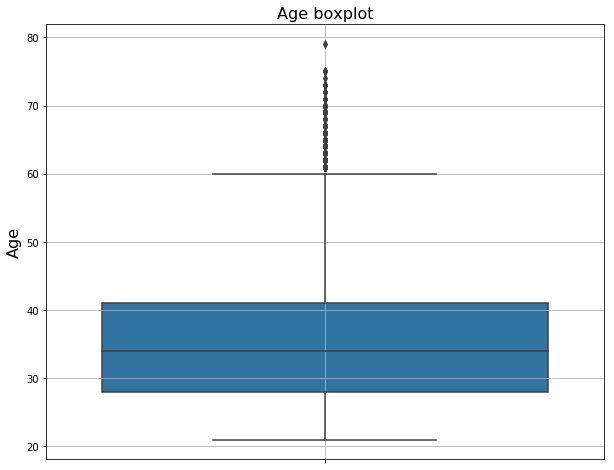

In [383]:
plt.figure(figsize=(10,8))
age=df[(df['AGE']>=21) & (df['AGE']<=80) ]
sns.boxplot( y=age['AGE'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.grid()
plt.show();

**Age Boxplot**

*The median age is 34 years old and most customers are between 28 and 41 years old*

### Bar Plot

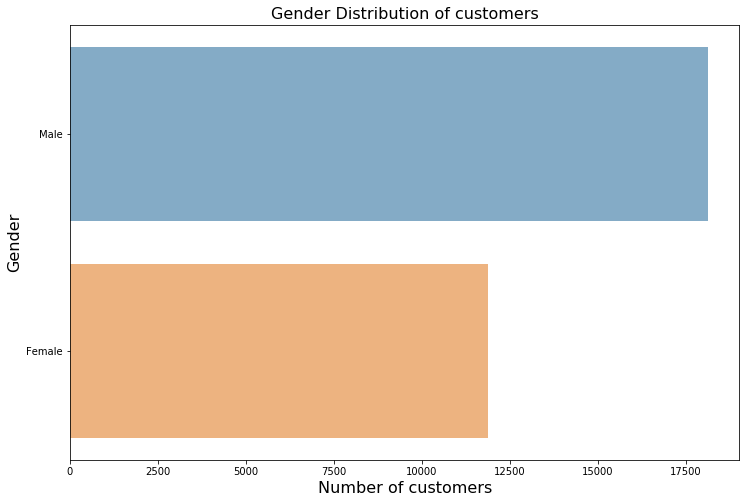

In [384]:
plt.figure(figsize=(12,8))
sex = df['SEX'].value_counts()
sns.barplot(y=sex.index, x=sex.values, alpha=0.6)
plt.yticks(range(len(df['SEX'].value_counts().index)), ['Male', 'Female'])
plt.title("Gender Distribution of customers", fontsize=16)
plt.xlabel("Number of customers", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.show();

*The above barplot shows the number of male and female customers in the dataset. Male customers are dominating population in the dataset so we can infer that there could be a possibility of males customers using the credit card more than female customers.*

### Factor Plot

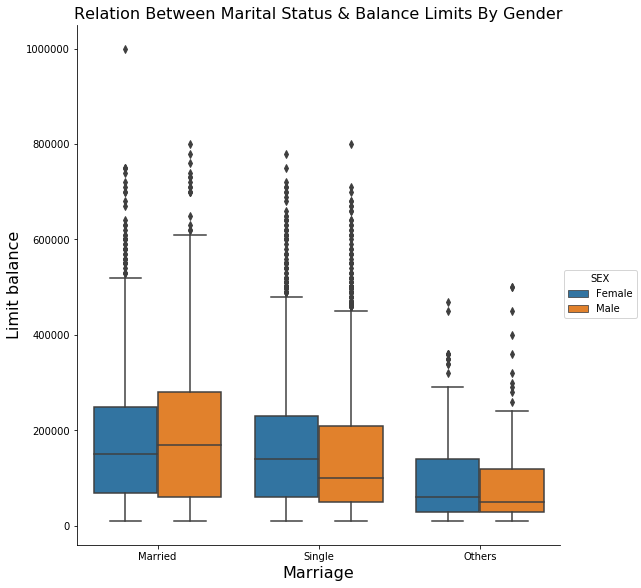

In [385]:
plt.figure(figsize=(20,8))
sns.factorplot(x="MARRIAGE", y="LIMIT_BAL", hue="SEX", data=df, kind="box", size=8)
plt.title("Relation Between Marital Status & Balance Limits By Gender", fontsize=16)
plt.xlabel("Marriage", fontsize=16)
plt.ylabel("Limit balance", fontsize=16)

*From the above plot we can see that there is no change at female side in balance limits depending on their marital status but it changes a lot for the male side maybe because of the expenditures after marriage which is the reason on increased balance limits.*

### Bar Plot

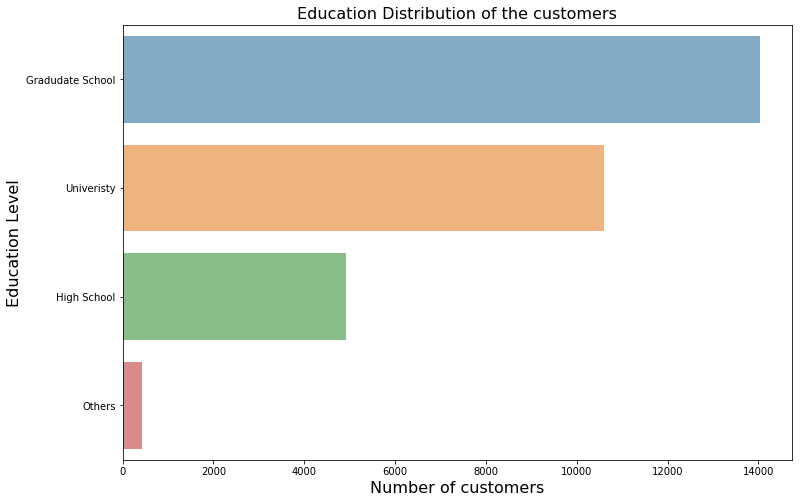

In [386]:
plt.figure(figsize=(12,8))
edu = df['EDUCATION'].value_counts()
sns.barplot(y=edu.index, x=edu.values, alpha=0.6)
plt.yticks(range(len(df['EDUCATION'].value_counts().index)), ['Gradudate School', 'Univeristy', 'High School', 'Others'])
plt.title("Education Distribution of the customers", fontsize=16)
plt.xlabel("Number of customers", fontsize=16)
plt.ylabel("Education Level", fontsize=16)
plt.show();

*The above barplot shows the number of customers and their education level in the data set. Maximum number of Graduate school students are using the  credit card followed by university going students, high school students and others.*

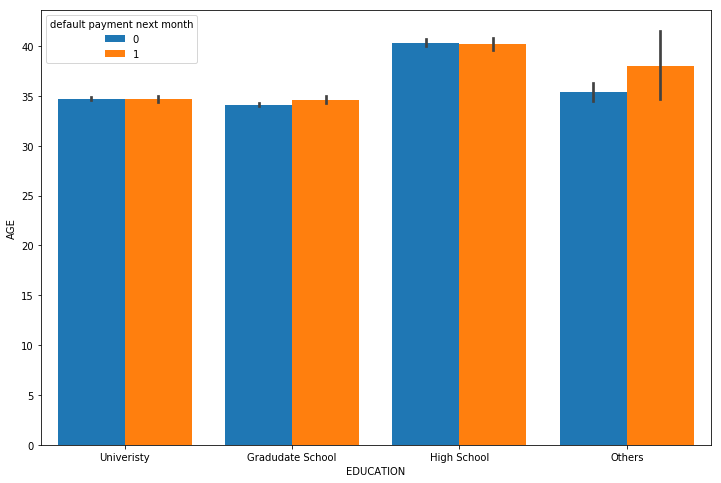

In [387]:
plt.figure(figsize=(12,8))
df["default payment next month"].replace({""})
sns.barplot(x='EDUCATION',y='AGE', hue='default payment next month', data=df, saturation=1 )

*The above graph is a comparison between age and education and shows customers who have a default payment next month. Most of the defaulters are others who could probably be school drop outs and hence don't have funds in the form of scholarship to meet their payments and endup being defaulters.
Whereas all the other students could be among the people with scholarship or funds from their parents and have an equal possibility of not being defaulters.*

### Pie chart and Count plot

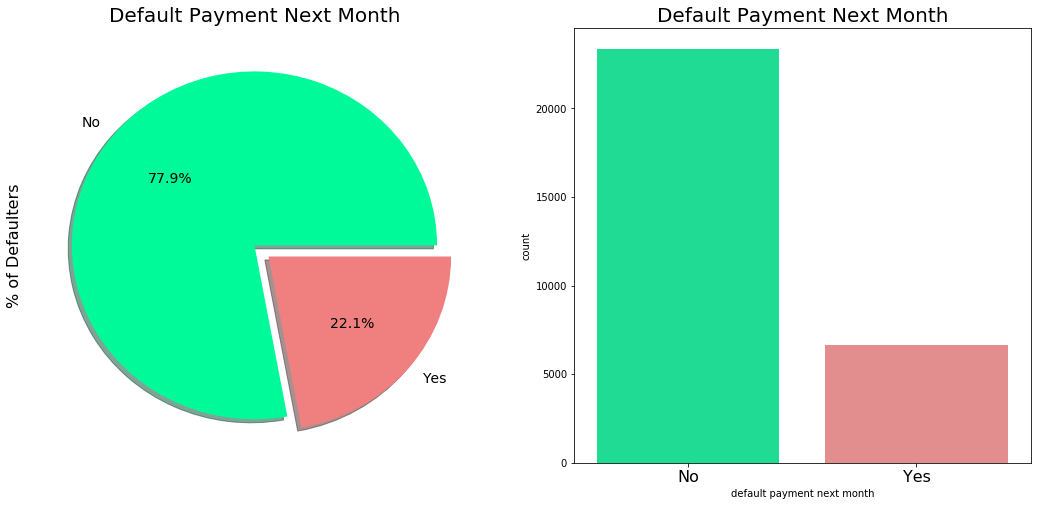

In [388]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["#00FA9A", "#F08080"]
labels = 'No', 'Yes'
df['default payment next month'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=14)
ax[0].set_title('Default Payment Next Month', fontsize=20)
ax[0].set_ylabel('% of Defaulters', fontsize=16)
sns.countplot('default payment next month',data=df,ax=ax[1], palette=colors)
ax[1].set_title('Default Payment Next Month', fontsize=20)
ax[1].set_xticklabels(['No', 'Yes'], fontsize=16)
plt.show()

*The Pie chart gives the percentage of defaulters and the Count plot gives the number of defaulters.
We can infer that 22.1% which is 6, 630 customer out of a total of 30,000 will be defaulters next month. Whereas 77.9% which is 23,370 will make the monthly payment.*

# Conclusions

* Finding the dataset as per the question and understanding the attributes related to the dataset.
* Pre-processing of data.
* Converting datetypes into appropriate datatype before plotting.
* Finding an appropriate visualization plot for the given set of attributes

# References

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://python-graph-gallery.com/seaborn/
3. https://seaborn.pydata.org/examples/index.html
4. http://www.scipy-lectures.org/intro/matplotlib/index.html
5. https://seaborn.pydata.org/generated/seaborn.countplot.html